<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/nfl_mlp_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras    
from tensorflow.keras import layers
from tensorflow.keras import metrics
from keras.metrics import Recall, Precision
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings; warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/nfl%20data%20project.csv")

In [3]:
df

,game_id,season,team,point_diff,wins,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,2002_01_ARI_WAS,2002,ARI,-8,0.0,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,2002_01_ARI_WAS,2002,WAS,8,1.0,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,2002_01_ATL_GB,2002,ATL,-3,0.0,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,2002_01_ATL_GB,2002,GB,3,1.0,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,2002_01_BAL_CAR,2002,BAL,-3,0.0,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,2021_18_SF_LA,2021,SF,3,1.0,0,0.167524,0.030746,0.356886,-0.368872,0,1,70,0
10268,2021_18_TEN_HOU,2021,HOU,-3,0.0,0,0.237720,0.053259,0.641079,-0.131478,1,0,70,0
10269,2021_18_TEN_HOU,2021,TEN,3,1.0,0,0.641079,-0.131478,0.237720,0.053259,0,0,70,0
10270,2021_18_WAS_NYG,2021,NYG,-15,0.0,-3,-0.333775,-0.584925,-0.356750,0.181794,1,0,70,0


In [4]:
df = df.iloc[:,3:]
df

,point_diff,wins,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,-8,0.0,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,8,1.0,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,-3,0.0,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,3,1.0,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,-3,0.0,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...
10267,3,1.0,0,0.167524,0.030746,0.356886,-0.368872,0,1,70,0
10268,-3,0.0,0,0.237720,0.053259,0.641079,-0.131478,1,0,70,0
10269,3,1.0,0,0.641079,-0.131478,0.237720,0.053259,0,0,70,0
10270,-15,0.0,-3,-0.333775,-0.584925,-0.356750,0.181794,1,0,70,0


In [5]:
# the wins column in index position 1 is our target feature. Lets move it to index 0 to make our code more simple later
wins = df.iloc[:,1]

# drop the wins column from the df
df=df.drop(df.columns[1], axis=1)

# insert the wins column back into the df in index position 0
df.insert(0, "wins", wins)

df

,wins,point_diff,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,0.0,-8,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,1.0,8,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,0.0,-3,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,1.0,3,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,0.0,-3,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...
10267,1.0,3,0,0.167524,0.030746,0.356886,-0.368872,0,1,70,0
10268,0.0,-3,0,0.237720,0.053259,0.641079,-0.131478,1,0,70,0
10269,1.0,3,0,0.641079,-0.131478,0.237720,0.053259,0,0,70,0
10270,0.0,-15,-3,-0.333775,-0.584925,-0.356750,0.181794,1,0,70,0


In [6]:
# Lets see if we have any games that weren't a win or a loss

print(np.unique(df['wins']))

[0.  0.5 1. ]


In [7]:
# We have some ties, so we need to drop those rows

df = df[df['wins'] != 0.5]

df.head()

,wins,point_diff,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,0.0,-8,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,1.0,8,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,0.0,-3,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,1.0,3,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,0.0,-3,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12


In [8]:
df.describe()

,wins,point_diff,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
count,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000,10248.000000
mean,0.500000,0.000000,0.000000,0.055881,-0.107549,0.055881,-0.107549,0.500000,0.237119,62.229703,5.886807
std,0.500024,14.982329,1.923541,0.306539,0.218637,0.306539,0.218637,0.500024,0.425337,14.815574,5.932221
min,0.000000,-59.000000,-7.000000,-1.846674,-2.397154,-1.846674,-2.397154,0.000000,0.000000,1.000000,0.000000
25%,0.000000,-9.000000,-1.000000,-0.143916,-0.236323,-0.143916,-0.236323,0.000000,0.000000,53.000000,0.000000
50%,0.500000,0.000000,0.000000,0.058831,-0.098012,0.058831,-0.098012,0.500000,0.000000,70.000000,5.000000
75%,1.000000,9.000000,1.000000,0.253145,0.031935,0.253145,0.031935,1.000000,0.000000,70.000000,9.000000
max,1.000000,59.000000,7.000000,1.454189,0.809347,1.454189,0.809347,1.000000,1.000000,102.000000,71.000000


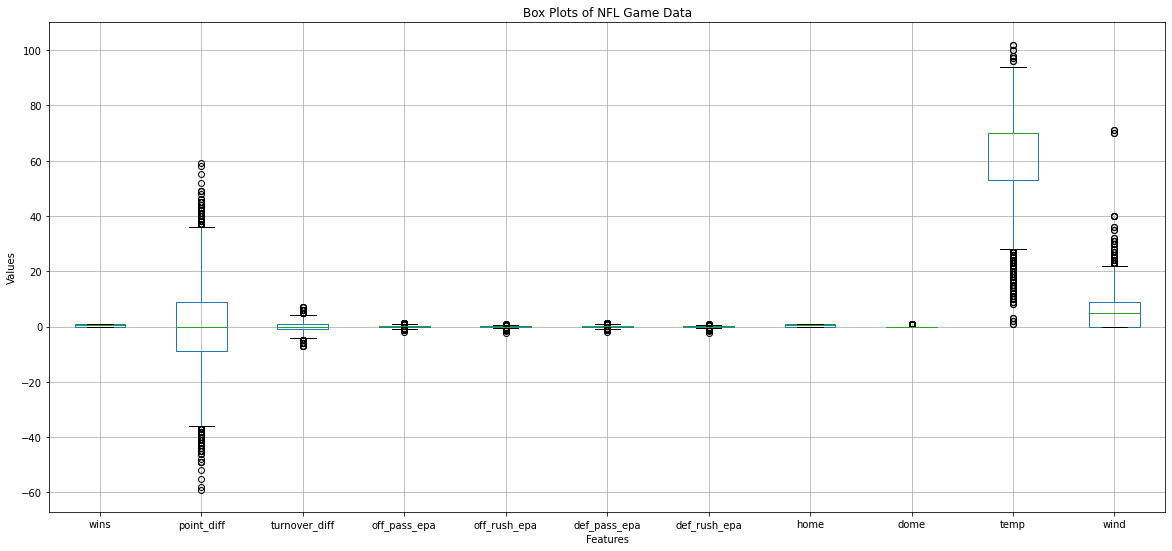

In [9]:
fig, ax = plt.subplots(figsize=(20,10))


df.boxplot(ax=ax)

ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Box Plots of NFL Game Data')

plt.subplots_adjust(bottom=0.2)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

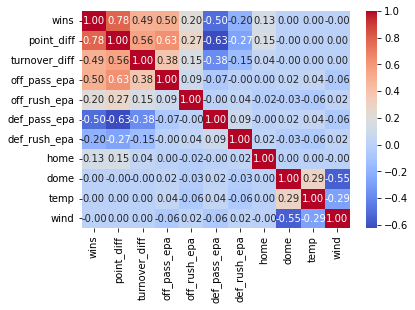

In [10]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.show

In [11]:
# create our target df and feature df

x = df.drop('wins', axis=1)

y = df.wins

In [12]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=87)

print('Training Input Shape: ', X_train.shape)
print('Testing Input Shape: ', X_test.shape)
print('Training Output Shape: ', y_train.shape)
print('Testing Output Shape: ', y_test.shape)

Training Input Shape:  (6661, 10)
Testing Input Shape:  (3587, 10)
Training Output Shape:  (6661,)
Testing Output Shape:  (3587,)


In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
# Build model with all features

model = tf.keras.Sequential([
    tf.keras.layers.Dense(250, activation = 'relu', input_shape = (10,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(10, activation = 'relu', bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(1, activation = 'sigmoid', bias_initializer = 'random_normal')
])

# Compile the the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_data = (X_test, y_test))

# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)


#print the results
print('Loss Score: ',  (test_loss * 100))
print('Test Accuracy: ', (test_accuracy * 100))
print('Test Precision: ', (test_precision* 100))
print('Recall: ', (test_recall* 100))


Epoch 1/50
134/134 [==============================] - 8s 31ms/step - loss: 0.1252 - accuracy: 0.9650 - precision: 0.9655 - recall: 0.9640 - val_loss: 0.0280 - val_accuracy: 0.9958 - val_precision: 1.0000 - val_recall: 0.9917
Epoch 2/50
134/134 [==============================] - 2s 16ms/step - loss: 0.0152 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
134/134 [==============================] - 2s 12ms/step - loss: 0.0063 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
134/134 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9997 - val_precision: 1.0000 - val_recall: 0.9994
Epoch 5/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 1.0000 -

113/113 [==============================] - 0s 2ms/step
Confusion Matrix: 
[[1770    0]
 [   0 1817]]


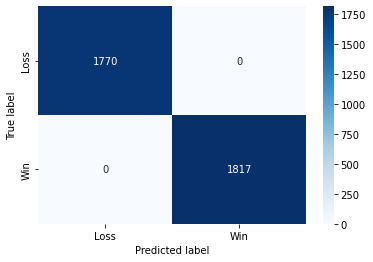

In [15]:
from sklearn.metrics import confusion_matrix

# predict classes for the test set
y_pred_prob = model.predict(X_test).round()
y_pred = (y_pred_prob > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score


# Train and evaluate your model here
model = tf.keras.Sequential([
    tf.keras.layers.Dense(250, activation = 'relu', input_shape = (10,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(10, activation = 'relu', bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(1, activation = 'sigmoid', bias_initializer = 'random_normal')
])

# Compile the the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Precision(), Recall()])

# Define the cross-validation method
cv_method = KFold(n_splits=5, shuffle=True, random_state=42)


scores = []


for train_index, test_index in cv_method.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
# evaluate model using cross-validation
    score = model.evaluate(X_test, y_test, verbose=0)
    scores.append(score[1])

# report performance
print('Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

Accuracy: 1.000 (0.000)


65/65 [==============================] - 0s 1ms/step
[[1000    0]
 [   0 1049]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1049

    accuracy                           1.00      2049
   macro avg       1.00      1.00      1.00      2049
weighted avg       1.00      1.00      1.00      2049



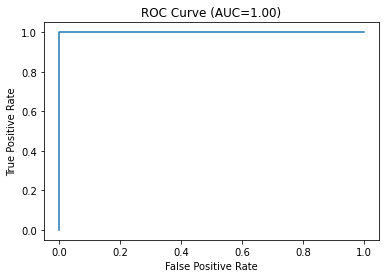

In [17]:
# Import necessary modules
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Generate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc))
plt.show()


It seems that the model is having too easy of a time predicting the wins. Let's look more closely at the df again to see if anything makes sense to eliminate

In [18]:
df.head()

,wins,point_diff,turnover_diff,off_pass_epa,off_rush_epa,def_pass_epa,def_rush_epa,home,dome,temp,wind
0,0.0,-8,0,0.043270,-0.030501,0.156047,0.097283,0,0,76,5
1,1.0,8,0,0.156047,0.097283,0.043270,-0.030501,1,0,76,5
2,0.0,-3,0,0.146118,0.430746,0.369264,0.094688,0,0,83,9
3,1.0,3,0,0.369264,0.094688,0.146118,0.430746,1,0,83,9
4,0.0,-3,-1,-0.054817,-0.015860,0.006126,-0.094776,0,0,78,12


<function matplotlib.pyplot.show(close=None, block=None)>

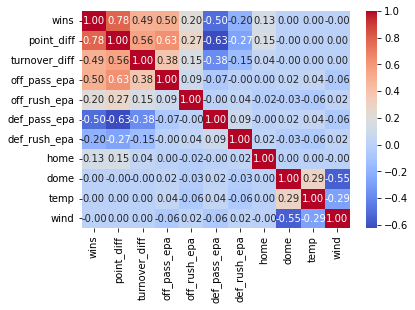

In [19]:
# Lets see what features are most highly correlated to wins and see what that tells us

corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.show

The Point Difference column is a direct link to a win. If it is positive, that means the team won, if it's negative, it means they lost. It should not be included in this data set if we want to predict the wins, without already knowing the result. Lets remove that column and run it through our models all over again. 

In [20]:
df_2 = df.drop('point_diff', axis=1)

x_2 = df_2.drop('wins', axis=1)

y_2 = df_2.wins

In [21]:
# Split data into training and testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.35, random_state=87)

print('Training Input Shape: ', X_train_2.shape)
print('Testing Input Shape: ', X_test_2.shape)
print('Training Output Shape: ', y_train_2.shape)
print('Testing Output Shape: ', y_test_2.shape)

Training Input Shape:  (6661, 9)
Testing Input Shape:  (3587, 9)
Training Output Shape:  (6661,)
Testing Output Shape:  (3587,)


In [22]:
# Build model with all features

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', input_shape = (9,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(10, activation = 'relu', bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(1, activation = 'sigmoid', bias_initializer = 'random_normal')
])

# Compile the the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(X_train_2, y_train_2, epochs = 100, batch_size = 50, validation_data = (X_test_2, y_test_2))

# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_2, y_test_2, verbose=0)


#print the results
print('Loss Score: ',  (test_loss * 100))
print('Test Accuracy: ', (test_accuracy * 100))
print('Test Precision: ', (test_precision* 100))
print('Recall: ', (test_recall* 100))


Epoch 1/100
134/134 [==============================] - 2s 6ms/step - loss: 0.5846 - accuracy: 0.7070 - precision_2: 0.7057 - recall_2: 0.7028 - val_loss: 0.4770 - val_accuracy: 0.7970 - val_precision_2: 0.8099 - val_recall_2: 0.7832
Epoch 2/100
134/134 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.7813 - precision_2: 0.7793 - recall_2: 0.7805 - val_loss: 0.4109 - val_accuracy: 0.8227 - val_precision_2: 0.8312 - val_recall_2: 0.8156
Epoch 3/100
134/134 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8287 - precision_2: 0.8223 - recall_2: 0.8355 - val_loss: 0.3615 - val_accuracy: 0.8506 - val_precision_2: 0.9056 - val_recall_2: 0.7870
Epoch 4/100
134/134 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8512 - precision_2: 0.8503 - recall_2: 0.8500 - val_loss: 0.3374 - val_accuracy: 0.8458 - val_precision_2: 0.7904 - val_recall_2: 0.9466
Epoch 5/100
134/134 [==============================] - 0s 4ms/step -

113/113 [==============================] - 0s 2ms/step
Confusion Matrix: 
[[1695   75]
 [ 357 1460]]


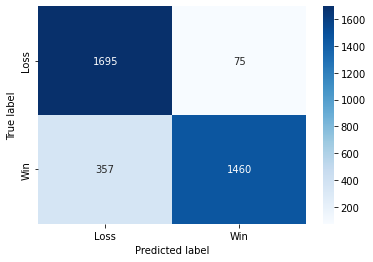

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1770
         1.0       0.95      0.80      0.87      1817

    accuracy                           0.88      3587
   macro avg       0.89      0.88      0.88      3587
weighted avg       0.89      0.88      0.88      3587



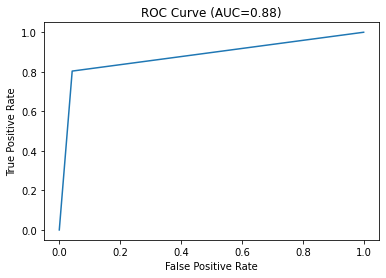

In [23]:
# predict classes for the test set
y_pred_prob_2 = model.predict(X_test_2).round()
y_pred_2 = (y_pred_prob_2 > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(y_test_2, y_pred_2, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()

# Generate classification report
cr = classification_report(y_test_2, y_pred_2)
print(cr)

# Generate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_2)
auc = roc_auc_score(y_test_2, y_pred_2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc))
plt.show()

Final Cross Validation for the model

In [24]:
# Train and evaluate your model here
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', input_shape = (9,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(10, activation = 'relu', bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(1, activation = 'sigmoid', bias_initializer = 'random_normal')
])

# Compile the the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Precision(), Recall()])

# Define the cross-validation method
cv_method = KFold(n_splits=5, shuffle=True, random_state=42)


scores = []


for train_index, test_index in cv_method.split(x):
    X_train_2, X_test_2 = x_2.iloc[train_index], x_2.iloc[test_index]
    y_train_2, y_test_2 = y_2.iloc[train_index], y_2.iloc[test_index]

    model.fit(X_train_2, y_train_2, epochs=10, batch_size=32, verbose=0)
# evaluate model using cross-validation
    score = model.evaluate(X_test_2, y_test_2, verbose=0)
    scores.append(score[1])

# report performance
print('Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

Accuracy: 0.891 (0.004)


In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the hyperparameters to tune
param_grid = {
    'num_layers': [1, 2, 3],
    'neurons': [5, 10, 50, 100, 150],  
    'optimizer': ['adam', 'rmsprop'], 
    'dropout': [0.2, 0.4, 0.6]
}

# Create the model using a function that takes in the hyperparameters
def create_model(num_layers, neurons, dropout, optimizer):
    model = Sequential()
    for i in range(num_layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy', Precision(), Recall()])
    return model

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=KerasClassifier(build_fn=create_model, epochs=50, batch_size=32), 
                           param_grid=param_grid, scoring='f1', cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_2, y_train_2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_



Streaming output truncated to the last 5000 lines.
Epoch 26/50
171/171 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.8902 - precision_225: 0.8885 - recall_225: 0.8911
Epoch 27/50
171/171 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.8855 - precision_225: 0.8849 - recall_225: 0.8849
Epoch 28/50
171/171 [==============================] - 0s 3ms/step - loss: 0.2654 - accuracy: 0.8838 - precision_225: 0.8817 - recall_225: 0.8853
Epoch 29/50
171/171 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.8862 - precision_225: 0.8865 - recall_225: 0.8845
Epoch 30/50
171/171 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.8868 - precision_225: 0.8852 - recall_225: 0.8875
Epoch 31/50
171/171 [==============================] - 0s 3ms/step - loss: 0.2624 - accuracy: 0.8869 - precision_225: 0.8852 - recall_225: 0.8878
Epoch 32/50
171/171 [==============================] - 0s 3ms/step - loss

In [26]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'dropout': 0.4, 'neurons': 50, 'num_layers': 1, 'optimizer': 'rmsprop'}
0.8929406190267589


Final model run with tuned hyperparameters

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu', input_shape = (9,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid', bias_initializer = 'random_normal')
])

# Compile the the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(X_train_2, y_train_2, epochs = 100, batch_size = 50, validation_data = (X_test_2, y_test_2))

# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_2, y_test_2, verbose=0)


#print the results
print('Loss Score: ',  (test_loss * 100))
print('Test Accuracy: ', (test_accuracy * 100))
print('Test Precision: ', (test_precision* 100))
print('Recall: ', (test_recall* 100))

Epoch 1/100
164/164 [==============================] - 3s 8ms/step - loss: 3.2939 - accuracy: 0.5169 - precision_305: 0.5166 - recall_305: 0.4363 - val_loss: 0.5509 - val_accuracy: 0.7252 - val_precision_305: 0.6866 - val_recall_305: 0.8522
Epoch 2/100
164/164 [==============================] - 1s 3ms/step - loss: 1.3144 - accuracy: 0.5957 - precision_305: 0.5946 - recall_305: 0.5863 - val_loss: 0.4731 - val_accuracy: 0.7848 - val_precision_305: 0.7946 - val_recall_305: 0.7817
Epoch 3/100
164/164 [==============================] - 1s 3ms/step - loss: 0.7148 - accuracy: 0.6789 - precision_305: 0.6771 - recall_305: 0.6766 - val_loss: 0.4641 - val_accuracy: 0.7823 - val_precision_305: 0.8204 - val_recall_305: 0.7359
Epoch 4/100
164/164 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7444 - precision_305: 0.7361 - recall_305: 0.7571 - val_loss: 0.4323 - val_accuracy: 0.8072 - val_precision_305: 0.8085 - val_recall_305: 0.8170
Epoch 5/100
164/164 [===============

65/65 [==============================] - 0s 2ms/step
Confusion Matrix: 
[[880 120]
 [101 948]]


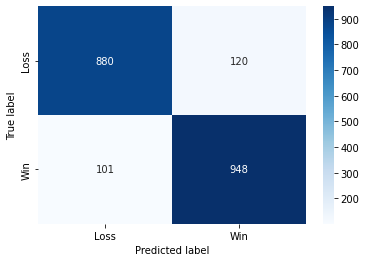

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1000
         1.0       0.89      0.90      0.90      1049

    accuracy                           0.89      2049
   macro avg       0.89      0.89      0.89      2049
weighted avg       0.89      0.89      0.89      2049



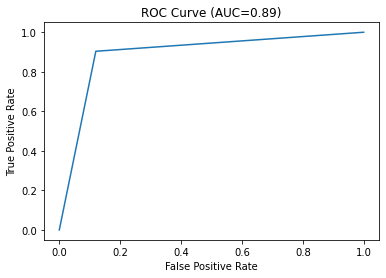

In [70]:
# predict classes for the test set
y_pred_prob_2 = model.predict(X_test_2).round()
y_pred_2 = (y_pred_prob_2 > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(y_test_2, y_pred_2, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()

# Generate classification report
cr = classification_report(y_test_2, y_pred_2)
print(cr)

# Generate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_2)
auc = roc_auc_score(y_test_2, y_pred_2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc))
plt.show()

In [71]:
#Cross Validation for tuned model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu', input_shape = (9,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid', bias_initializer = 'random_normal')
])

# Compile the the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Precision(), Recall()])

# Define the cross-validation method
cv_method = KFold(n_splits=5, shuffle=True, random_state=42)


scores = []


for train_index, test_index in cv_method.split(x):
    X_train_2, X_test_2 = x_2.iloc[train_index], x_2.iloc[test_index]
    y_train_2, y_test_2 = y_2.iloc[train_index], y_2.iloc[test_index]

    model.fit(X_train_2, y_train_2, epochs=10, batch_size=32, verbose=0)
# evaluate model using cross-validation
    score = model.evaluate(X_test_2, y_test_2, verbose=0)
    scores.append(score[1])

# report performance
print('Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

Accuracy: 0.892 (0.006)
